In [1]:
## Initial setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import io
import requests
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Sets seed for the entire notebook

np.random.seed(42)

## Fair ML

In [3]:
from sklearn.linear_model import LogisticRegression
from fairml import audit_model
from fairml import plot_dependencies

In [4]:
# Import data

url = "https://raw.githubusercontent.com/arguz95/Project_ML2/master/Data/bankrupcy.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
bankruptcy = df.copy() # we can use this as raw data afterwards
bankruptcy['Bankrupt']=bankruptcy['Bankrupt?']
bankruptcy.drop("Bankrupt?", 1,inplace=True)
bankruptcy.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,1


In [5]:
# create feature and design matrix for model building.
compas_rating = bankruptcy.Bankrupt.values
propublica_data = bankruptcy.drop("Bankrupt", 1)


# this is just for demonstration, any classifier or regressor
# can be used here. fairml only requires a predict function
# to diagnose a black-box model.

# we fit a quick and dirty logistic regression sklearn
# model here.
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(propublica_data.values, compas_rating)
clf.fit(propublica_data.values, compas_rating)

C:\Users\johnn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\johnn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
#  call audit model with model
total, _ = audit_model(clf.predict, propublica_data)

# print feature importance
print(total)

plt.figure(figsize=(20,10))

# generate feature dependence plot
fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence"
)
#plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight')
plt

Feature: ROA(C) before interest and depreciation before interest,	 Importance: 0.48834139903211615
Feature: ROA(A) before interest and % after tax,	 Importance: 0.4909810822701276
Feature: ROA(B) before interest and depreciation after tax,	 Importance: 0.4917143276140197
Feature: Operating Gross Margin,	 Importance: 0.5050593928728553
Feature: Realized Sales Gross Margin,	 Importance: 0.5050593928728553
Feature: Operating Profit Rate,	 Importance: 0.5076990761108667
Feature: Pre-tax net Interest Rate,	 Importance: 0.508139023317202
Feature: After-tax net Interest Rate,	 Importance: 0.508139023317202
Feature: Non-industry income and expenditure/revenue,	 Importance: 0.5074057779733099
Feature: Continuous interest rate (after tax),	 Importance: 0.508139023317202
Feature: Operating Expense Rate,	 Importance: -0.1338905997946913
Feature: Research and development expense rate,	 Importance: -0.15750109986801583
Feature: Cash flow rate,	 Importance: 0.5057926382167474
Feature: Interest-bearin

<module 'matplotlib.pyplot' from 'C:\\Users\\johnn\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

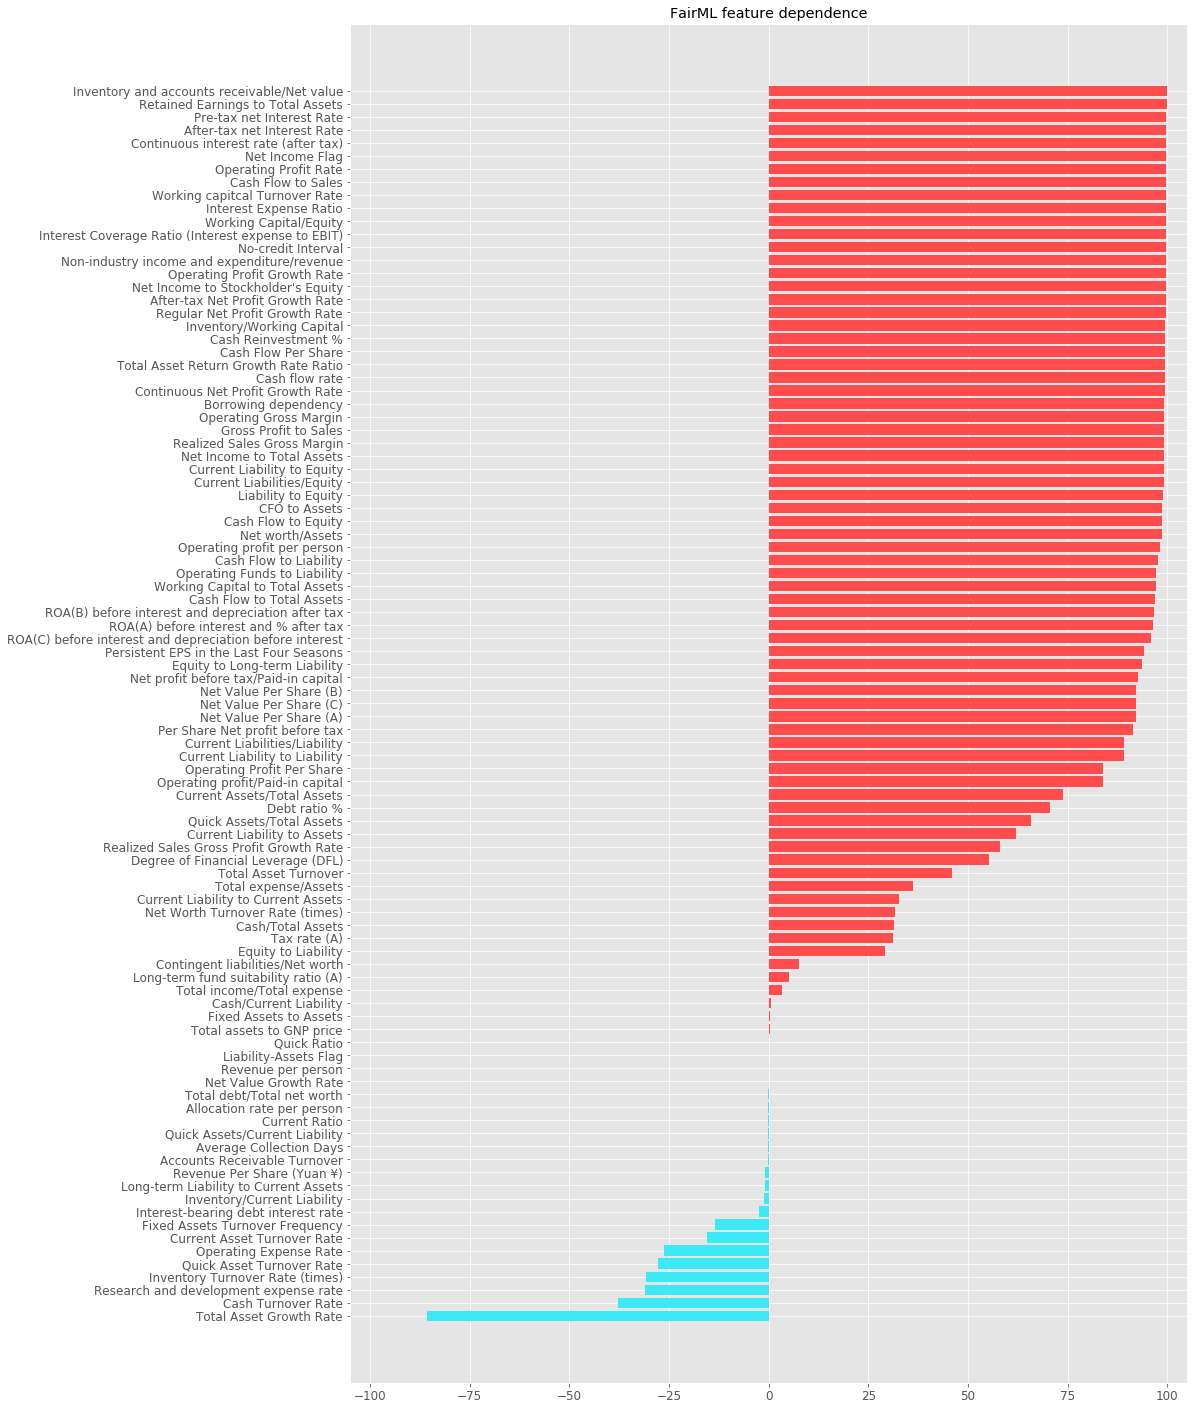

In [7]:
fig.set_size_inches(15,25)
fig